In [12]:
### Run this cell before continuing.
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

# Heart Disease and Age
<img align="left" src="https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/slideshows/how_heart_disease_affects_your_body_slideshow/650x350_how_heart_disease_affects_your_body_slideshow.jpg" width="500"/>

## Introduction

**Background Information**

Heart disease is a broad range of diseases that affects an individual's heart and blood vessels.

These diseases can be influenced by many factors, including underlying health conditions and lifestyle choices.


**Our Question**

Can the age of an individual with heart disease be predicted by the severity of their symptoms? If so, what are the best predictors? 

**The Dataset** 

We are using the “Heart Disease” dataset. This dataset describes a range of attributes, as well as an indication as to the presence of heart disease within each individual. The specific datasets we will be analyzing contains a subset of 14 main attributes, including information about a patient’s sex, age, symptoms, and diagnosis. The data has been collected in a variety of countries.

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Methods

In [59]:
# First we must read in the datasets.
van_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num")) %>%
                filter(restecg != "?") %>%
                filter(chol != "?") %>%
                filter(trestbps != "?")

cleveland_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num")) %>%
                filter(restecg != "?") %>%
                filter(chol != "?") %>%
                filter(trestbps != "?")

hungary_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num")) %>%
                filter(restecg != "?") %>%
                filter(chol != "?") %>%
                filter(trestbps != "?")

switzerland_data_csv <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names =
               c("age", "sex", "chest_pain", "trestbps", "chol",
               "fbs",  "restecg", "thalach", "exang", "oldpeak", 
               "slope", "ca", "thal", "num")) %>%
                filter(restecg != "?") %>%
                filter(chol != "?") %>%
                filter(trestbps != "?")

#Next, we can merge these, as they all have the same predictors. More data can ensure our analysis is more accurate.
heart_disease_data <- rbind(van_data_csv,cleveland_data_csv,hungary_data_csv, switzerland_data_csv) %>%
                select(restecg, chol, age, trestbps)
heart_disease_data

Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, chest_pain, restecg, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, chest_pain, trestbps, chol, fbs, restecg, thalach, exang...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, chest_pain, oldpeak, num

ℹ Use 

restecg,chol,age,trestbps
<chr>,<chr>,<dbl>,<chr>
1,260,63,140
1,209,44,130
1,218,60,132
⋮,⋮,⋮,⋮
2,0,72,160
1,0,73,160
1,0,74,145


**Exploratory Data Analysis**

In [66]:
#in order to make the analysis reproducible:
set.seed(0915)

#split the data into testing and training set:  
heart_split <- initial_split(heart_disease_data, prop = 0.75, strata = age) 
heart_train <- training(heart_split)  
heart_test <- testing(heart_split)  

#In our exploratory data analysis, we used only three variables as predictors: age, resting electrocardiographic rate, 
#resting blood pressure, and cholesterol levels.
heart_data_explore <- heart_train %>%
             select(age, restecg, trestbps, chol) %>%
             arrange(desc(chol))


head(heart_data_explore)

age,restecg,trestbps,chol
<dbl>,<chr>,<chr>,<chr>
56,0,120,85
54,0,130,603
32,0,118,529
53,0,145,518
44,0,135,491
53,0,113,468


This table shows that individuals with higher cholesterol levels tend to fall within an older age range (50 +)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



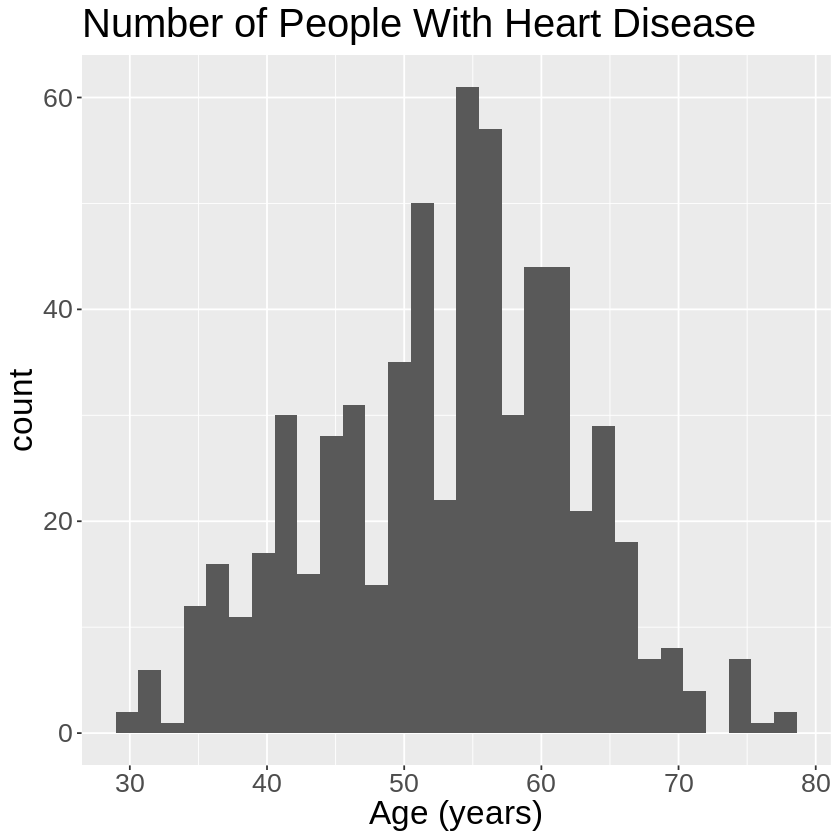

In [58]:
#In order to visualize the age distribution:
heart_plot_hist <- ggplot(heart_train, aes(x = age)) + 
            geom_histogram() + 
            labs(x = "Age (years)", title = "Number of People With Heart Disease") + 
            theme( text = element_text(size = 20)) 
heart_plot_hist

Through this histogram, we can see a correlation between age, and the quantity of people that contract heart disease. The majority of those with heart disease are bewteen the ages of 55 and 65.

**Data Analysis**

In order to investigate our question we created a K-Nearest Neighbors regression model in order to predict an individual's age, based on their present symptoms.

TO DO: 
- create regression model
- graph prediction accuracy, determine best predictors


# Discussion

TO DO:
- summarize findings. Is there a relationship? What is it? What are the best predictors?
- Were our results expected?
- Impact of our findings?
- Future Questions?

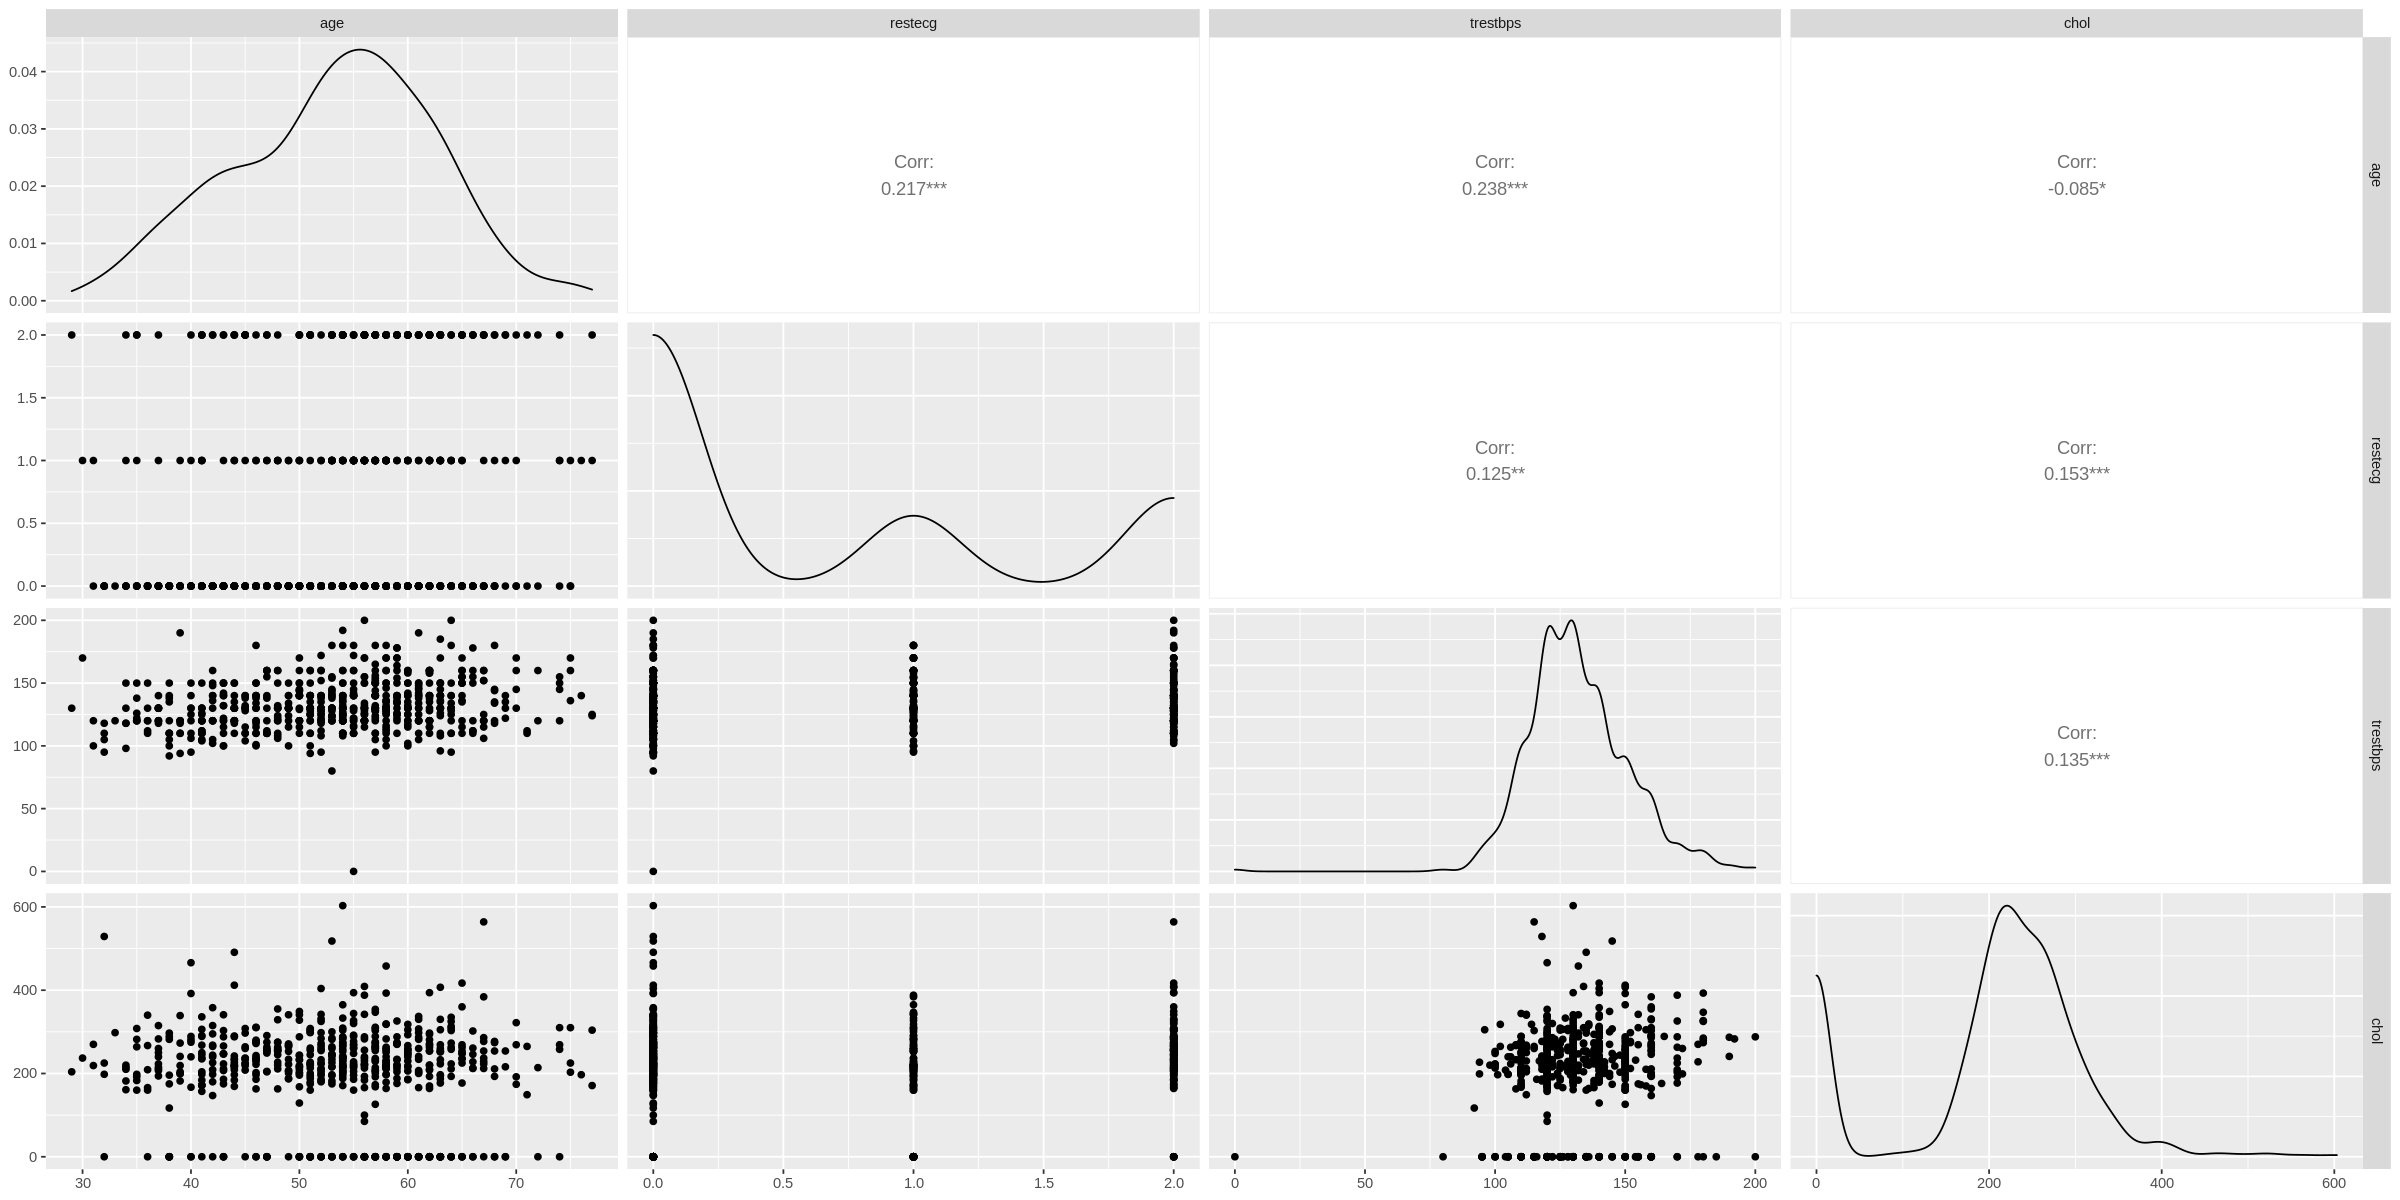

In [81]:
set.seed(2000)

#?? not working


heart_predicting_testing <- as_tibble(select(heart_train,age, restecg, trestbps, chol))




options(repr.plot.height = 10, repr.plot.width = 20)
heart_train_predictors <- heart_predicting_testing %>%
    mutate_all(as.numeric) %>%
    ggpairs(columns = 1:4, alpha = 0.05)%>%
    suppressWarnings()

#van_train_predictors <- ggpairs(van_train, columns = 1:6)



heart_train_predictors
